# Исследование надежности заемщиков


#### Загрузка и Знакомство с данными

In [2]:
import pandas as pd

try:
    data = pd.read_csv("I'm sorry but dni")
except:
    data = pd.read_csv("I'm sorry but dni")

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,"-8,437.67",42,высшее,0,женат / замужем,0,F,сотрудник,0,"253,875.64",покупка жилья
1,1,"-4,024.80",36,среднее,1,женат / замужем,0,F,сотрудник,0,"112,080.01",приобретение автомобиля
2,0,"-5,623.42",33,Среднее,1,женат / замужем,0,M,сотрудник,0,"145,885.95",покупка жилья
3,3,"-4,124.75",32,среднее,1,женат / замужем,0,M,сотрудник,0,"267,628.55",дополнительное образование
4,0,"340,266.07",53,среднее,1,гражданский брак,1,F,пенсионер,0,"158,616.08",сыграть свадьбу
5,0,-926.19,27,высшее,0,гражданский брак,1,M,компаньон,0,"255,763.57",покупка жилья
6,0,"-2,879.20",43,высшее,0,женат / замужем,0,F,компаньон,0,"240,525.97",операции с жильем
7,0,-152.78,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,"135,823.93",образование
8,2,"-6,929.87",35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,"95,856.83",на проведение свадьбы
9,0,"-2,188.76",41,среднее,1,женат / замужем,0,M,сотрудник,0,"144,425.94",покупка жилья для семьи


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

In [6]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [7]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

In [8]:
data['days_employed'] = data['days_employed'].abs()

In [9]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный       366,413.65
в декрете           3,296.76
госслужащий         2,689.37
компаньон           1,547.38
пенсионер         365,213.31
предприниматель       520.85
сотрудник           1,574.20
студент               578.75
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

In [10]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

In [11]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [12]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

In [13]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [14]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

In [15]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

In [16]:
data['education'] = data['education'].str.lower()

In [17]:
data.duplicated().sum()

71

In [18]:
data = data.drop_duplicates()

### Категоризация данных

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [19]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [20]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [21]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [22]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [23]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Исследовательский анализ (EDA)

#### Зависимость между количеством детей и возвратом кредита в срок?

😉 *всё не так и всё не то* **если нет id** 😉

In [24]:
data.insert(0, 'id', data.index + 1)

data.head(3)

,id,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,1,"8,437.67",42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,2,1,"4,024.80",36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,3,0,"5,623.42",33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью


In [25]:
import math

def sample_size(population_size, margin_error=0.05, confidence_level=0.95, p=0.5):
    """
    Расчет размера выборки для заданной генеральной совокупности.
    
    :param population_size: Размер генеральной совокупности (N)
    :param margin_error: Погрешность выборки (E), по умолчанию 5%
    :param confidence_level: Уровень доверия, по умолчанию 95%
    :param p: Предполагаемая пропорция, по умолчанию 0.5
    :return: Минимальный объем выборки
    """
    # Z-значение для заданного уровня доверия
    z = {0.90: 1.645, 0.95: 1.96, 0.99: 2.576}[confidence_level]

    # Расчет части формулы без коррекции на конечную совокупность
    basic_sample_size = ((z**2) * p * (1 - p)) / (margin_error**2)

    # Коррекция на конечную совокупность
    corrected_sample_size = basic_sample_size / (1 + (basic_sample_size - 1) / population_size)

    return math.ceil(corrected_sample_size)  # Округление вверх до ближайшего целого числа

In [26]:
min_sample_size = sample_size(data['id'].count())

f'Минимальный размер выборки: {min_sample_size}'

'Минимальный размер выборки: 378'

In [27]:
def relation(param, axis_name):
    '''отношение допустивших просрочку к общему кол-ву в процентах'''
    debt = data[data['debt'] == True].groupby(param)['debt'].count()
    all = data.groupby(param)['debt'].count()
    return pd.concat([all, debt, (debt / all) * 100, all > min_sample_size], 
                     axis = 1, 
                     keys=['всего',
                           'задолженность',
                           '% задолженностей',
                           'репрезентативность']).fillna(0).rename_axis(axis_name)

In [28]:
relation('children', 'кол-во детей')

,всего,задолженность,% задолженностей,репрезентативность
кол-во детей,,,,
0,14091,"1,063.00",7.54,True
1,4808,444.00,9.23,True
2,2052,194.00,9.45,True
3,330,27.00,8.18,False
4,41,4.00,9.76,False
5,9,0.00,0.00,False


In [29]:
rel = data.groupby('children').agg({'id': 'count', 'debt': 'sum'})

rel['percent'] = (rel['debt'] / rel['id']) * 100
rel['represent'] = rel.apply(lambda x: x['id'] > min_sample_size, axis = 1)


rel = rel.rename(columns={'id': 'всего',
                          'debt': 'задолженность',
                          'percent': '% задолженностей',
                          'represent': 'репрезентативность'})

rel = rel.rename_axis('кол-во детей')

rel

,всего,задолженность,% задолженностей,репрезентативность
кол-во детей,,,,
0,14091,1063,7.54,True
1,4808,444,9.23,True
2,2052,194,9.45,True
3,330,27,8.18,False
4,41,4,9.76,False
5,9,0,0.00,False


**Вывод:** 

- *Бездетные* реже допускаю *просрочки* по кредиту.

- Касаемо групп умеющих трёх и больше детей выводы делать нельзя, размер выборки недостаточен.

- Можно утверждать что с появлением детей снижается платёжеспособность.

#### Зависимость между семейным положением и возвратом кредита в срок?

In [30]:
res = relation('family_status', 'семейное положение')

res.sort_values('% задолженностей')

,всего,задолженность,% задолженностей,репрезентативность
семейное положение,,,,
вдовец / вдова,951,63,6.62,True
в разводе,1189,84,7.06,True
женат / замужем,12261,927,7.56,True
гражданский брак,4134,385,9.31,True
Не женат / не замужем,2796,273,9.76,True


In [31]:
table = pd.pivot_table(data, values=['id', 'debt'], index=['family_status'], aggfunc={'id': 'count', 'debt': 'sum'}, )

table['percent'] = (table['debt'] / table['id']) * 100
table['represent'] = table.apply(lambda x: x['id'] > min_sample_size, axis = 1)

table = table.rename(columns={'id': 'всего','debt': 'задолженность', 'percent': '% задолженностей', 'represent': 'репрезентативность'})

table = table.rename_axis('семейное положение')

table.sort_values('% задолженностей')

,задолженность,всего,% задолженностей,репрезентативность
семейное положение,,,,
вдовец / вдова,63,951,6.62,True
в разводе,84,1189,7.06,True
женат / замужем,927,12261,7.56,True
гражданский брак,385,4134,9.31,True
Не женат / не замужем,273,2796,9.76,True


**Вывод:** 

*Да*, зависимость между семейным положением и возвратом кредита в срок действительно есть. 

Наибольшее кол-во просрочек допускают *Не женатые/не замужние* или *сожительствующие* в то время как состоящие в браке или разведённые, меньше, наиболее отвественными заёмщиками являются вдовствующие.

In [32]:
table['средний возраст'] = data.groupby('family_status')['dob_years'].mean().map(int)

table['медианный возраст'] = data.groupby('family_status')['dob_years'].median().map(int)

table.sort_values('средний возраст')

,задолженность,всего,% задолженностей,репрезентативность,средний возраст,медианный возраст
семейное положение,,,,,,
Не женат / не замужем,273,2796,9.76,True,38,36
гражданский брак,385,4134,9.31,True,42,41
женат / замужем,927,12261,7.56,True,43,43
в разводе,84,1189,7.06,True,45,46
вдовец / вдова,63,951,6.62,True,56,58


<Axes: xlabel='семейное положение', ylabel='Возраст'>

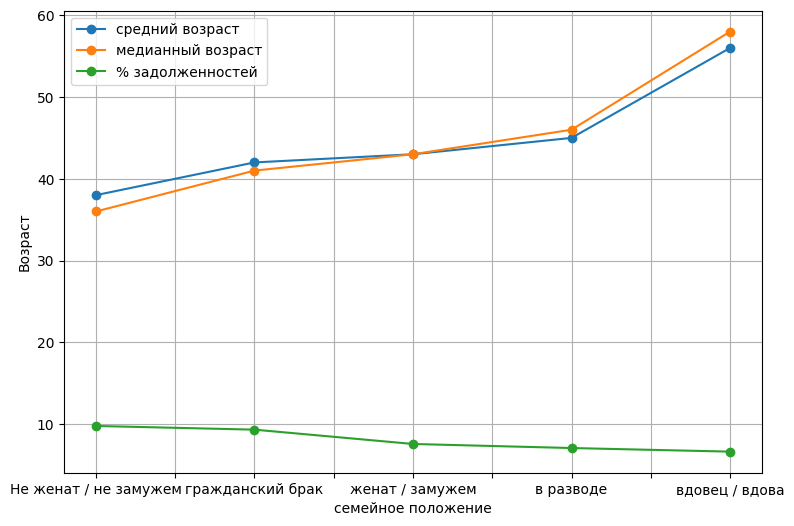

In [43]:
import matplotlib

table[['средний возраст', 'медианный возраст', '% задолженностей']].sort_values('средний возраст').plot(grid=True,
                                                                                                        figsize=(9, 6),
                                                                                                        ylabel='Возраст',
                                                                                                        style='o-')

На графике мы видим что средний и медианный возраст в группе очень близкие величины. 

Так же мы наблюдаем снижение процента задолженностей с ростом возраста.

#### Зависимость между уровнем дохода и возвратом кредита в срок?

In [34]:
relation('total_income_category', 'доходы')

,всего,задолженность,% задолженностей,репрезентативность
доходы,,,,
A,25,2,8.00,False
B,5014,354,7.06,True
C,15921,1353,8.50,True
D,349,21,6.02,False
E,22,2,9.09,False


**Вывод:** 

К сожалению нельзя корректно оценить группы A, D, E, данных недостаточно.
По группам B и С, можно предположить больше доход, меньше % задолженностей.

#### Цели кредита влияют на его возврат в срок?

In [35]:
relation('purpose_category', 'цель кредитования')

,всего,задолженность,% задолженностей,репрезентативность
цель кредитования,,,,
операции с автомобилем,4279,400,9.35,True
операции с недвижимостью,10751,780,7.26,True
получение образования,3988,369,9.25,True
проведение свадьбы,2313,183,7.91,True


**Вывод:** 

*Получение образования* и *автомобиль* являются более рискованными категориями чем *свадьба* или *недвижимость*.

#### Возможные причины появления пропусков в исходных данных.

`Пропуски в исходных данных` могут возникать по множеству причин, зависящих от контекста сбора данных, их обработки и специфики предметной области. Вот несколько общих причин появления таких пропусков:

1. **Ошибки ввода данных**: Неверное вводимое значение может привести к тому, что поле останется пустым. Например, пользователь мог случайно пропустить поле или ввести данные в неправильном формате, что привело бы к ошибке и не записи данных.

2. **Отсутствие информации**: В некоторых случаях информация может быть неизвестна на момент сбора данных. Например, у респондента может не быть ответа на определённый вопрос анкеты.

3. **Технические ошибки**: Проблемы с оборудованием или программным обеспечением, такие как сбои в базах данных или при передаче данных, могут привести к утере информации.

4. **Проблемы с интеграцией данных**: При объединении данных из разных источников могут возникать несоответствия, из-за чего некоторые данные могут быть пропущены или потеряны.

5. **Цензурирование данных**: Иногда данные цензурируются по причинам конфиденциальности или безопасности, что может приводить к намеренным пропускам в наборах данных.

6. **Отказ от ответа**: Респонденты могут выбрать не отвечать на некоторые вопросы, что также приведёт к пропускам в данных.

7. **Природное отсутствие данных**: В некоторых случаях данные могут не существовать по своей природе. Например, если речь идет о характеристиках объекта, который не обладает этими характеристиками.

#### Заполнение пропусков медианным значением.

- *Устойчивость к выбросам*: Медиана менее чувствительна к аномалиям и выбросам по сравнению со средним значением. Если данные содержат экстремальные значения или искажены, медиана обеспечивает более надежное и репрезентативное значение для заполнения пропусков.

- *Сохранение распределения данных*: Заполнение пропусков медианой может помочь сохранить исходное распределение данных, не внося значительные искажения, так как медиана отражает центральное значение набора данных.

- *Простота реализации*: Вычисление медианы просто и не требует сложных вычислений, что делает этот метод доступным и легко реализуемым на практике.

Однако важно понимать, что медиана может не всегда быть лучшим выбором для заполнения пропусков. Эффективность этого метода зависит от специфики данных и целей исследования.

### Общий вывод

<div style="border:solid Chocolate 2px; padding: 40px">

#### Предобработка данных
В ходе предобработки данных были выявлены и устранены следующие проблемы:

 - *Пропущенные значения*: Пропуски в данных о доходах и трудовом стаже были заполнены медианными значениями по соответствующим категориям типов занятости, что позволило сохранить целостность данных без значительного искажения общих тенденций.

 - *Аномальные значения*: Отрицательные значения трудового стажа были преобразованы в положительные, а нестандартные значения в данных о количестве детей были удалены для повышения точности анализа.

 - *Типы данных*: Корректировка типов данных проведена для обеспечения корректной обработки числовых и категориальных переменных.



#### Ответы на цели проекта

- *Зависимость между наличием детей и возвратом кредита в срок*: Клиенты без детей чаще возвращают кредиты в срок (просрочек 7.54%), в то время как наличие детей увеличивает риск просрочек до (в группах с одним и двумя детьми) 9.23% и 9.45% соответственно. Данные по группам с тремя и более детьми нерепрезентативны, к сожалению невозможно корректно оценить как колличество детей влияет на платёжеспособность.

- *Влияние семейного положения и возраста на кредитоспособность*: Более старшие клиенты и вдовцы/вдовы показали себя более надежными заемщиками 6.62% задолженностей, в то время как разведённые 7.06%, состоящие в браке 7.56%, состоящие в гражданском браке 9.31%, не женатые/не замужние 9.76%. Мною обнаружена корреляция между семейным положением и возрастом заемщиков: чем старше клиент, тем меньше вероятность просрочки. Так же нужно обратить внимание на прямую связь между возрастом и семейным положением. Средний возраст вдовствующих - 56 лет, разведённых - 45, состоящих в браке - 43, живущих гражданским браком - 42, не состоящих в браке 38 лет.

- *Взаимосвязь уровня дохода и возврата кредита*: К сожалению в группах E, D, A (0–30000 — 'E',  30001–50000 — 'D',  1000001 и выше — 'A') недостаточно данных для объективного исследования, однако опираясь на данные из групп В, С (50001–200000 — 'C' - 8.50%, 200001–1000000 — 'B' - 7.06%), можно строить гипотезу о том что клиенты с более высоким уровнем дохода демонстрируют лучшую кредитную историю.

- *Цели кредита и их влияние на платежеспособность*: Кредиты, взятые на операции с недвижимостью, оказались самыми надежными, задолженностей 7.26%, проведение свадеб 7.91 %, в отличие от кредитов на образование 9.25% и автокредитов 9.35%.

#### Рекомендации для заказчика

- *Фокус на бездетных заемщиках и вдовцах/вдовах, а также старших возрастных группах*: Приоритизация этих категорий клиентов может помочь снизить кредитные риски.

- *Мониторинг*: Регулярный анализ данных клиентов поможет выявлять новые тенденции и корректировать кредитную политику в соответствии с изменениями в поведении заемщиков.

- *Данные*: В ходе анализа данных было выявлено, что выборки по некоторым категориям клиентов оказались недостаточно репрезентативными. Это означает, что полученные результаты могут не полностью отражать реальное положение дел из-за недостаточного количества данных по этим группам. Для более точной и обоснованной аналитики рекомендуется увеличить объем данных.